## 练习1
- 并列显示两张子图
- 第一张为 dog.jpg 原图灰度图
- 第二张为 dog.jpg 灰度图被添加噪音后的图像
  - 要求噪音值符合 20倍 标准正太分布

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tabulate import tabulate

# 读取图像并转换为灰度图
img = Image.open('/Users/mac/Desktop/numpy_calculation_question_set/dog.jpg').convert('L')
img_array = np.array(img)

# 显示原图灰度图
plt.subplot(1, 2, 1)  # 创建一个1x2的子图网格，并在第1个位置绘图
plt.imshow(img_array, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')  # 关闭坐标轴

# 添加噪音（使用标准正态分布噪音）
noise = np.random.normal(0, 20 * img_array.std() / img_array.max(), img_array.shape)
noisy_img = img_array + noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)  # 确保值在0-255之间

# 显示添加噪音后的图像
plt.subplot(1, 2, 2)  # 在第2个位置绘图
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Grayscale Image')
plt.axis('off')  # 关闭坐标轴

# 显示图像
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

## 练习2
- 计算`dog.jpg`的三个通道的
    - max 最大值
    - min 最小值
    - mean 平均值
    - std 标准差
    - 25% 分位数
    - 50% 分位数
    - 70% 分位数
- 请使用`tabulate`[[链接](https://zzutai.wolai.com/5Gn4c94kEfpWBekczG5gZ)]实现以下效果
```txt
+------+--------------------+--------------------+--------------------+
| meta | R                  | G                  | B                  |
+------+--------------------+--------------------+--------------------+
| max  | 255                | 255                | 255                |
+------+--------------------+--------------------+--------------------+
| min  | 0                  | 0                  | 0                  |
+------+--------------------+--------------------+--------------------+
| mean | 181.421051         | 169.47528066666666 | 151.87428366666666 |
+------+--------------------+--------------------+--------------------+
| std  | 61.430459500391734 | 69.71584693328025  | 83.18132740623544  |
+------+--------------------+--------------------+--------------------+
| 25%  | 144.0              | 121.0              | 79.0               |
+------+--------------------+--------------------+--------------------+
| 50%  | 198.0              | 192.0              | 189.0              |
+------+--------------------+--------------------+--------------------+
| 75%  | 228.0              | 224.0              | 222.0              |
+------+--------------------+--------------------+--------------------+
```

In [2]:
#TODO
# 读取图像
img = Image.open('/Users/mac/Desktop/numpy_calculation_question_set/dog.jpg')
# 将图像转换为numpy数组
img_array = np.array(img)

# 分别计算R、G、B通道的统计信息
channels = ['R', 'G', 'B']
stats = {channel: {} for channel in channels}

for channel in channels:
    channel_data = img_array[:, :, channels.index(channel)].flatten()
    stats[channel]['max'] = np.max(channel_data)
    stats[channel]['min'] = np.min(channel_data)
    stats[channel]['mean'] = np.mean(channel_data)
    stats[channel]['std'] = np.std(channel_data)
    stats[channel]['25%'] = np.percentile(channel_data, 25)
    stats[channel]['50%'] = np.percentile(channel_data, 50)
    stats[channel]['75%'] = np.percentile(channel_data, 75)

# 格式化表格数据
table_data = []
header = ['meta', 'R', 'G', 'B']
table_data.append(header)

for metric in ['max', 'min', 'mean', 'std', '25%', '50%', '75%']:
    row = [metric]
    for channel in channels:
        row.append(stats[channel][metric])
    table_data.append(row)

# 打印表格
print(tabulate(table_data, headers='firstrow', tablefmt='pretty', floatfmt=".2f"))



+------+--------------------+--------------------+--------------------+
| meta | R                  | G                  | B                  |
+------+--------------------+--------------------+--------------------+
| max  | 255                | 255                | 255                |
+------+--------------------+--------------------+--------------------+
| min  | 0                  | 0                  | 0                  |
+------+--------------------+--------------------+--------------------+
| mean | 181.421051         | 169.47528066666666 | 151.87428366666666 |
+------+--------------------+--------------------+--------------------+
| std  | 61.430459500391734 | 69.71584693328025  | 83.18132740623544  |
+------+--------------------+--------------------+--------------------+
| 25%  | 144.0              | 121.0              | 79.0               |
+------+--------------------+--------------------+--------------------+
| 50%  | 198.0              | 192.0              | 189.0        

## 练习3
- 并列显示两张子图
- 第一张为 dog.jpg 原图RGB图
- 第二张为 dog.jpg RGB图被添加噪音后的图像
  - 要求噪音值符合 20倍 标准正太分布
- 注意: 有可能需要对加上噪音的彩图进行极小极大值归一 [[链接](https://zzutai.wolai.com/23rRgaWcBJif4xw1Tww3kt)] ，否则会超出可视范围导致图像显示不正常

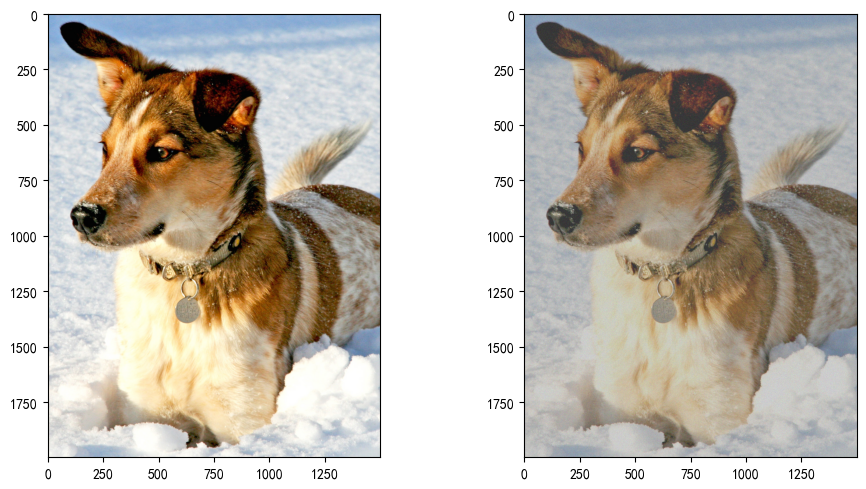

In [17]:
#TODO
# 读取图像
img = Image.open('/Users/mac/Desktop/numpy_calculation_question_set/dog.jpg')
img_array = np.array(img)

# 生成符合20倍标准正态分布的噪音
# 假设我们要使用图像像素强度的标准差作为噪音的标准差
# 但因为图像像素值在0-255之间，我们先将其归一化到0-1范围
img_array_normalized = img_array / 255.0
std_dev = img_array_normalized.std()
noise = np.random.normal(0, 20 * std_dev, img_array.shape)

# 将噪音添加到原始图像上
noisy_img = img_array + noise

# 归一化噪音图像，确保像素值在0-255之间
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# 绘制原图
plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original RGB Image')
plt.axis('off')

# 绘制噪音图像
plt.subplot(1, 2, 2)
plt.imshow(noisy_img)
plt.title('Noisy RGB Image')
plt.axis('off')

# 显示图像
plt.tight_layout()
plt.show()

## 练习4
- 显示3行子图
- 第一行：`dog.jpg`RGB原图、第二行图合成RGB图，第三行图合成RGB图
- 第二行：R、G、B三通道彩图
- 第三行：R、G、B单通道灰度图

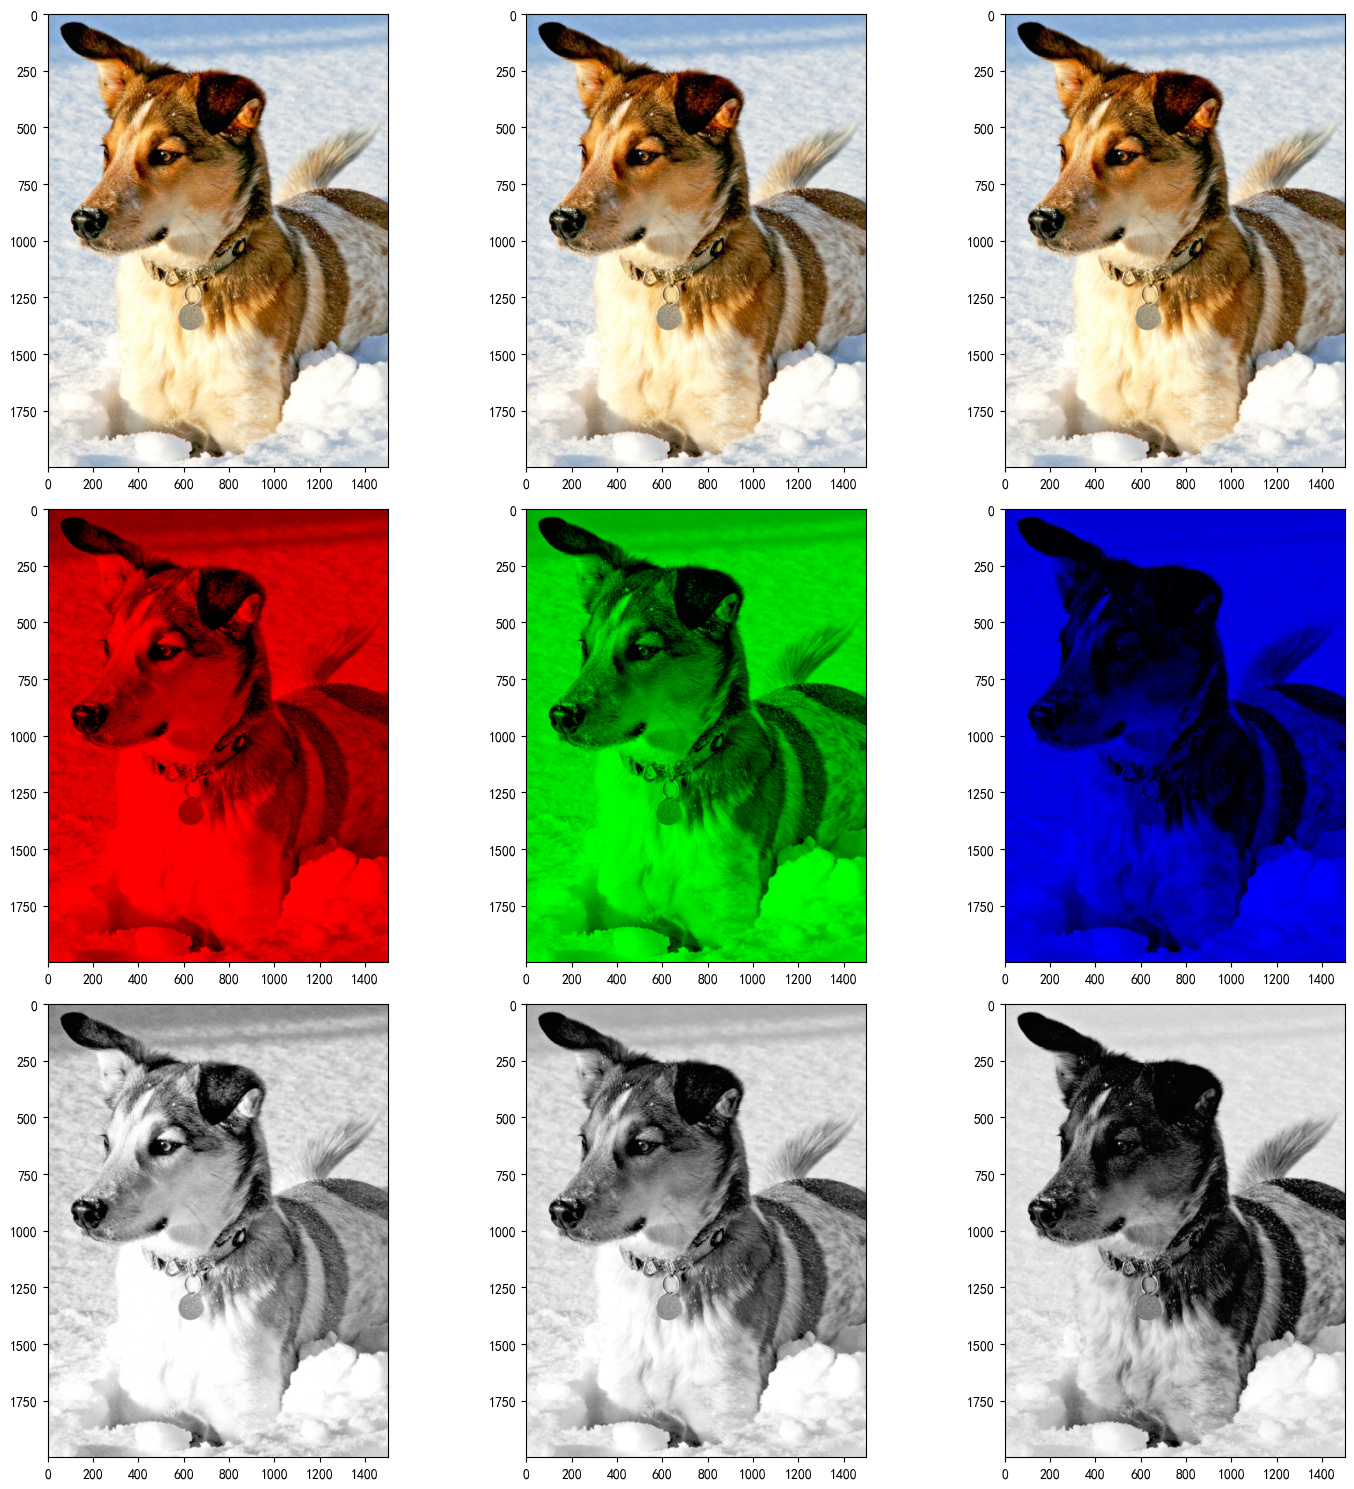

In [19]:
#TODO
# 读取图像
img = Image.open('/Users/mac/Desktop/numpy_calculation_question_set/dog.jpg')
img_array = np.array(img)

# 创建图形和子图
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

# 第一行：RGB原图
axs[0, 0].imshow(img_array)
axs[0, 0].set_title('Original RGB Image')
axs[0, 0].axis('off')

# 第二行：R、G、B三通道彩图
for i, channel in enumerate(['R', 'G', 'B']):
    axs[1, i].imshow(img_array[:, :, i], cmap='gray')  # 使用灰度映射显示单个通道
    axs[1, i].set_title(f'{channel} Channel')
    axs[1, i].axis('off')

# 第三行：R、G、B单通道灰度图（这里其实和上一行相同，但保持一致性）
for i, channel in enumerate(['R', 'G', 'B']):
    axs[2, i].imshow(img_array[:, :, i], cmap='gray')
    axs[2, i].set_title(f'{channel} Channel in Grayscale')
    axs[2, i].axis('off')

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

## 练习5
- 使用`monkey.jpg`作为前景, `moon.jpg`作为背景，实现以下特效
- 请注意不要使用任何形式的`for`循环，仅使用numpy(比较)运算实现以下效果

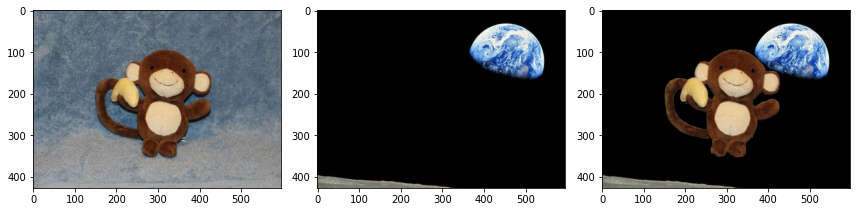

In [4]:
#TODO
def load_image(path):
    """尝试加载图像并处理潜在的异常"""
    try:
        return Image.open(path)
    except IOError:
        print(f"Error: Unable to open image file {path}")
        return None


# 图像文件路径
foreground_path = '/Users/mac/Desktop/python-ipa-basic/monkey.jpg'
background_path = '/Users/mac/Desktop/python-ipa-basic/moon.jpg'

# 加载图像并检查是否成功加载
foreground = load_image(foreground_path)
background = load_image(background_path)

if foreground is not None and background is not None:
    # 确保两张图片尺寸一致
    foreground = foreground.resize(background.size)

    # 转换为NumPy数组
    fg_np = np.array(foreground)
    bg_np = np.array(background)

    # 定义透明度因子
    alpha = 0.5  # 前景图像半透明

    # Alpha blending
    blended = (1 - alpha) * bg_np + alpha * fg_np

    # 转换回PIL图像并显示
    result = Image.fromarray(np.uint8(blended))
    result.show()

else:
    print("One or both of the images failed to load.")



# 练习6

- 参考[使用形态学变化实现植物图像的骨架提取](https://www.wolai.com/www_family/dwWbn5KF9Xd46a483D7fAa#rasK49LAAvSfwihtxGQwKt)代码
- 不使用`bitwise_xor`，达到同样效果
- 提示：要用`np.bitwise_not`和`np.bitwise_and`的组合来尝试模拟`XOR`

In [ ]:
#TODO
# 读取图像并转换为二值图像
img = cv2.imread("/Users/mac/Desktop/python-ipa-basic/plant.png", 0)  # 以灰度模式读取图像
img_copy = img.copy()  # 创建原始图像的副本，用于最后的显示
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 对图像进行二值化处理，阈值为127

# 创建骨架图像和临时图像
skel = np.zeros(img.shape, np.uint8)  # 创建一个与原始图像大小相同的空骨架图像
temp = np.zeros(img.shape, np.uint8)  # 创建一个与原始图像大小相同的空临时图像

# 定义结构元素
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))  # 定义一个3x3的十字形结构元素

# 主循环
done = False  # 标志变量，用于判断是否完成骨架提取
process_imgs = {}  # 用于存储处理过程中的图像

while not done:
    img_cp = img.copy()  # 创建原始图像的副本，用于显示处理过程
    fg, ax = plt.subplots(1, 5, figsize=(20, 5))  # 创建一个1行5列的子图，用于显示处理过程
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')

    cv2.morphologyEx(img, cv2.MORPH_OPEN, element, temp)  # 进行开操作，用来消除图像中的小白点
    ax[1].imshow(temp, cmap='gray')
    ax[1].set_title('Open Operation')

    # 模拟XOR操作
    img_cp_inv = np.bitwise_not(img_cp)
    temp_inv = np.bitwise_not(temp)
    temp_xor = np.bitwise_and(img_cp_inv, temp_inv)
    temp_xor = np.bitwise_not(temp_xor)

    ax[2].imshow(temp_xor, cmap='gray')
    ax[2].set_title('Simulated XOR Operation')

    skel = cv2.bitwise_or(skel, temp_xor)  # 使用模拟的XOR结果更新骨架图像
    ax[3].imshow(skel, cmap='gray')
    ax[3].set_title('OR Operation')

    img = cv2.erode(img, element)  # 对原始图像进行腐蚀操作
    ax[4].imshow(img, cmap='gray')
    ax[4].set_title('Erode Operation')

    # 关闭所有子图的坐标轴显示
    for a in ax:
        a.axis('off')

    plt.show()  # 显示处理过程的子图

    done = cv2.countNonZero(img) == 0  # 判断是否完成骨架提取

# 显示最终结果的子图
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_copy, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(skel, cmap='gray')
ax[1].set_title('Skeleton Image')
ax[1].axis('off')

plt.show()  # 显示最终结果的子图